In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram


In [3]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [7]:
from keras import regularizers

In [8]:
import os

In [9]:
mylist= os.listdir('Rawdata/')

In [10]:
type(mylist)

list

In [11]:
print(mylist[550])

03-01-04-01-02-01-23.wav


In [12]:
print(mylist[550][6:-16])

04


In [13]:
data, sampling_rate = librosa.load('Rawdata/03-01-01-01-01-01-19.wav')

In [14]:

import os
import pandas as pd
import librosa
import glob 

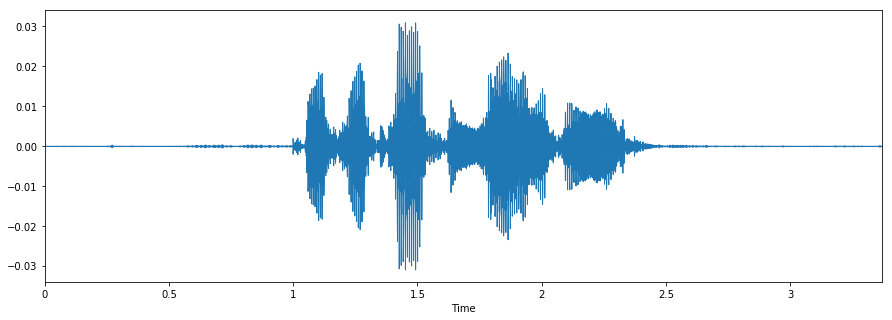

In [15]:
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

In [16]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys

In [17]:
sr,x = scipy.io.wavfile.read('Rawdata/03-01-01-01-01-01-19.wav')

g:\main_project\project\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [18]:
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

In [19]:
window = np.hamming(nwin)

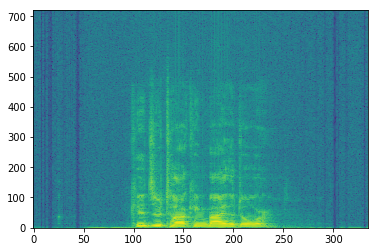

In [20]:
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [21]:
feeling_list=[]
for item in mylist:
    if item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
   

In [22]:
labels = pd.DataFrame(feeling_list)

In [23]:
labels[:10]

,0
0,male_calm
1,female_calm
2,male_calm
3,female_calm
4,male_calm
5,female_calm
6,male_calm
7,female_calm
8,male_calm
9,female_calm


In [24]:
##feature extraction-mffc
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08':
        X,sample_rate = librosa.load('Rawdata/'+y, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=25),axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1

           

In [25]:
print(feature)

[-26.18894877 -26.27455769 -26.23068876 -25.64892859 -25.71193849
 -25.86918703 -25.40340469 -26.06224231 -26.05222407 -25.98169666
 -25.22258789 -25.28979053 -25.96772495 -25.90449867 -24.87846036
 -24.1681428  -24.77050386 -25.6645103  -25.80270305 -25.45600536
 -25.62839745 -25.81609842 -25.25787305 -25.49168966 -26.11082817
 -26.2757351  -26.07939551 -26.0164907  -26.03755876 -26.18951221
 -26.30312274 -26.05626885 -25.91018048 -26.28880095 -24.09301926
 -22.41022867 -20.91955668 -22.0151542  -22.80654331 -24.9727928
 -25.82886156 -23.51184561 -22.5389233  -24.09653391 -24.96930598
 -23.28081365 -17.53547928 -12.58957363 -10.82711175 -11.26517683
 -11.19431385 -11.77822185 -13.79500465 -15.59257688 -15.48935416
 -16.68094486 -18.34664883 -20.19940351 -19.48474894 -18.78124761
 -18.63859116 -17.7208394  -16.09647372 -14.08277917 -13.08049059
 -14.95366082 -15.48163841 -15.38305087 -15.17053705 -16.6090683
 -18.04254873 -18.63993152 -19.08485196 -19.0440878  -18.67759854
 -16.0252503

In [26]:
df[:5]

,feature
0,"[-36.53923736376019, -36.53923736376019, -36.5..."
1,"[-34.16797924833946, -34.16797924833946, -31.7..."
2,"[-34.050899419026, -34.050899419026, -34.05089..."
3,"[-33.55479353380303, -33.55479353380303, -33.5..."
4,"[-29.443441242991245, -28.557839983068693, -29..."


In [27]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [28]:
df3[:5]

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,...,-29.842229,-29.329018,-29.779419,-29.194505,-28.699031,-30.019322,-31.897177,-31.632639,-31.277070,-31.248471
1,-34.167979,-34.167979,-31.771845,-30.309784,-30.367199,-32.068974,-32.238552,-27.683350,-26.326280,-25.971756,...,-22.338016,-23.291048,-23.498923,-23.318617,-23.316489,-24.149615,-26.477938,-28.017908,-27.088167,-26.243719
2,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,...,-16.286313,-17.089397,-17.814817,-18.096985,-18.806236,-20.231513,-22.190851,-23.663313,-21.960530,-20.840591
3,-33.554794,-33.554794,-33.554794,-33.554794,-33.554794,-33.554794,-33.554794,-33.554794,-33.554794,-33.242587,...,-25.283861,-24.175053,-23.732919,-23.702299,-21.692923,-20.661391,-20.556339,-20.940569,-21.348075,-21.014013
4,-29.443441,-28.557840,-29.979394,-33.418753,-36.420116,-32.344471,-31.199991,-31.758667,-30.273080,-28.568996,...,-19.384905,-21.854987,-22.718048,-22.279716,-21.665806,-20.627910,-20.073579,-21.598840,-22.348998,-22.432569


In [29]:
df3 = pd.DataFrame(df['feature'].values.tolist())


df3[:5]


,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,...,-29.842229,-29.329018,-29.779419,-29.194505,-28.699031,-30.019322,-31.897177,-31.632639,-31.277070,-31.248471
1,-34.167979,-34.167979,-31.771845,-30.309784,-30.367199,-32.068974,-32.238552,-27.683350,-26.326280,-25.971756,...,-22.338016,-23.291048,-23.498923,-23.318617,-23.316489,-24.149615,-26.477938,-28.017908,-27.088167,-26.243719
2,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,...,-16.286313,-17.089397,-17.814817,-18.096985,-18.806236,-20.231513,-22.190851,-23.663313,-21.960530,-20.840591
3,-33.554794,-33.554794,-33.554794,-33.554794,-33.554794,-33.554794,-33.554794,-33.554794,-33.554794,-33.242587,...,-25.283861,-24.175053,-23.732919,-23.702299,-21.692923,-20.661391,-20.556339,-20.940569,-21.348075,-21.014013
4,-29.443441,-28.557840,-29.979394,-33.418753,-36.420116,-32.344471,-31.199991,-31.758667,-30.273080,-28.568996,...,-19.384905,-21.854987,-22.718048,-22.279716,-21.665806,-20.627910,-20.073579,-21.598840,-22.348998,-22.432569


In [30]:
newdf = pd.concat([df3,labels], axis=1)


In [31]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [32]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,-36.539237,...,-29.329018,-29.779419,-29.194505,-28.699031,-30.019322,-31.897177,-31.632639,-31.277070,-31.248471,male_calm
1,-34.167979,-34.167979,-31.771845,-30.309784,-30.367199,-32.068974,-32.238552,-27.683350,-26.326280,-25.971756,...,-23.291048,-23.498923,-23.318617,-23.316489,-24.149615,-26.477938,-28.017908,-27.088167,-26.243719,female_calm
2,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,-34.050899,...,-17.089397,-17.814817,-18.096985,-18.806236,-20.231513,-22.190851,-23.663313,-21.960530,-20.840591,male_calm
3,-33.554794,-33.554794,-33.554794,-33.554794,-33.554794,-33.554794,-33.554794,-33.554794,-33.554794,-33.242587,...,-24.175053,-23.732919,-23.702299,-21.692923,-20.661391,-20.556339,-20.940569,-21.348075,-21.014013,female_calm
4,-29.443441,-28.557840,-29.979394,-33.418753,-36.420116,-32.344471,-31.199991,-31.758667,-30.273080,-28.568996,...,-21.854987,-22.718048,-22.279716,-21.665806,-20.627910,-20.073579,-21.598840,-22.348998,-22.432569,male_calm


In [33]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
100,-26.965086,-27.227394,-28.608745,-31.322690,-28.109796,-26.816502,-28.663240,-34.044607,-38.277115,-37.099811,...,-17.915663,-17.597151,-17.294063,-17.218018,-18.082451,-19.767351,-21.191271,-23.773142,-23.462999,male_calm
1036,-17.777649,-17.652067,-17.795499,-18.808366,-19.512828,-19.535122,-19.974015,-20.395113,-21.902783,-22.555436,...,-24.937900,-25.836771,-23.677906,-22.663505,-21.684266,-21.214499,-20.358000,-20.063442,-20.537808,female_calm
533,-27.286264,-26.758861,-26.110984,-25.149001,-24.452719,-24.490016,-25.031629,-24.513118,-25.038773,-24.337350,...,-22.685792,-24.508786,-24.259598,-23.961152,-24.846599,-26.835973,-26.034814,-25.450275,-24.203475,female_sad
861,-30.338715,-29.818410,-29.451691,-29.966998,-30.128910,-29.501860,-28.710458,-28.348314,-28.611684,-27.610958,...,-28.456826,-29.532603,-29.246024,-28.444863,-27.711639,-27.351997,-27.657152,-28.345003,-29.441736,female_fearful
557,-25.894198,-24.094387,-23.598919,-23.755358,-24.078033,-24.545574,-23.650533,-23.869724,-23.631941,-25.009560,...,-24.950094,-25.663593,-25.470007,-26.695302,-28.317134,-27.870191,-27.438160,-21.631729,-17.378683,female_sad
1247,-24.622919,-24.622919,-24.622919,-24.622919,-24.622919,-24.622919,-24.622919,-24.618646,-24.872568,-25.194442,...,-14.993358,-14.902809,-15.234076,-14.825229,-14.679504,-14.064161,-13.840331,-8.006088,-5.307950,female_happy
82,-29.056009,-28.804727,-27.958464,-27.015251,-26.791612,-26.946878,-27.295513,-26.435640,-27.262325,-28.837269,...,-24.620489,-24.521722,-23.713005,-23.095804,-24.114317,-23.827993,-23.388762,-24.387461,-26.119747,male_calm
1777,-32.140817,-31.809695,-32.973906,-32.194511,-30.797362,-29.544537,-30.135850,-30.625262,-32.294284,-29.411543,...,-21.620935,-21.503143,-22.232038,-22.227106,-22.202146,-21.329364,-21.503878,-16.440019,-12.442494,male_fearful
1390,-22.961916,-23.048999,-22.829829,-23.079594,-22.810361,-22.061444,-21.946114,-20.805033,-21.177207,-21.716677,...,-19.841111,-19.616432,-17.949320,-18.055327,-14.936280,-15.227654,-15.495339,-13.795882,-10.477066,male_sad
307,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,...,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,female_happy


In [34]:
rnewdf=rnewdf.fillna(0)

In [35]:
print(len(rnewdf))

1880


In [36]:
##splitting train data and test data
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [37]:
newdf1

array([ True,  True, False, ..., False,  True,  True])

In [38]:
newdf1.shape

(1880,)

In [39]:
train.shape

(1494, 217)

In [40]:
test.shape

(386, 217)

In [41]:
trainfeatures = train.iloc[:, :-1]

In [42]:
trainfeatures

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
100,-26.965086,-27.227394,-28.608745,-31.322690,-28.109796,-26.816502,-28.663240,-34.044607,-38.277115,-37.099811,...,-18.007178,-17.915663,-17.597151,-17.294063,-17.218018,-18.082451,-19.767351,-21.191271,-23.773142,-23.462999
1036,-17.777649,-17.652067,-17.795499,-18.808366,-19.512828,-19.535122,-19.974015,-20.395113,-21.902783,-22.555436,...,-23.541638,-24.937900,-25.836771,-23.677906,-22.663505,-21.684266,-21.214499,-20.358000,-20.063442,-20.537808
861,-30.338715,-29.818410,-29.451691,-29.966998,-30.128910,-29.501860,-28.710458,-28.348314,-28.611684,-27.610958,...,-27.202279,-28.456826,-29.532603,-29.246024,-28.444863,-27.711639,-27.351997,-27.657152,-28.345003,-29.441736
557,-25.894198,-24.094387,-23.598919,-23.755358,-24.078033,-24.545574,-23.650533,-23.869724,-23.631941,-25.009560,...,-25.159499,-24.950094,-25.663593,-25.470007,-26.695302,-28.317134,-27.870191,-27.438160,-21.631729,-17.378683
1247,-24.622919,-24.622919,-24.622919,-24.622919,-24.622919,-24.622919,-24.622919,-24.618646,-24.872568,-25.194442,...,-15.263003,-14.993358,-14.902809,-15.234076,-14.825229,-14.679504,-14.064161,-13.840331,-8.006088,-5.307950
82,-29.056009,-28.804727,-27.958464,-27.015251,-26.791612,-26.946878,-27.295513,-26.435640,-27.262325,-28.837269,...,-26.279676,-24.620489,-24.521722,-23.713005,-23.095804,-24.114317,-23.827993,-23.388762,-24.387461,-26.119747
1777,-32.140817,-31.809695,-32.973906,-32.194511,-30.797362,-29.544537,-30.135850,-30.625262,-32.294284,-29.411543,...,-21.190289,-21.620935,-21.503143,-22.232038,-22.227106,-22.202146,-21.329364,-21.503878,-16.440019,-12.442494
1390,-22.961916,-23.048999,-22.829829,-23.079594,-22.810361,-22.061444,-21.946114,-20.805033,-21.177207,-21.716677,...,-19.990798,-19.841111,-19.616432,-17.949320,-18.055327,-14.936280,-15.227654,-15.495339,-13.795882,-10.477066
307,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,...,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649,-28.190649
379,-22.168325,-22.168325,-22.168325,-22.168325,-22.168325,-22.168325,-22.168325,-22.168325,-22.168325,-22.168325,...,-22.168325,-22.168325,-22.168325,-22.168325,-22.168325,-22.168325,-22.168325,-22.168325,-22.168325,-22.168325


In [43]:
trainlabel = train.iloc[:, -1:]

In [44]:
trainlabel

,0
100,male_calm
1036,female_calm
861,female_fearful
557,female_sad
1247,female_happy
82,male_calm
1777,male_fearful
1390,male_sad
307,female_happy
379,female_happy


In [45]:
testfeatures = test.iloc[:, :-1]

In [46]:
testlabel = test.iloc[:, -1:]

In [47]:
##model creation and fitting
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [48]:
X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

In [49]:
X_train

array([[-26.96508575, -27.22739447, -28.60874529, ..., -21.19127084,
        -23.77314153, -23.46299864],
       [-17.77764868, -17.65206669, -17.79549889, ..., -20.35800038,
        -20.06344184, -20.53780783],
       [-30.33871527, -29.81841016, -29.45169119, ..., -27.65715218,
        -28.34500332, -29.44173595],
       ...,
       [-33.63822634, -33.63822634, -33.63822634, ..., -25.25644428,
        -19.90070948, -15.70497595],
       [-24.53893571, -25.32569698, -24.01255918, ..., -17.93425756,
        -12.66833133,  -9.2679038 ],
       [-33.19223641, -33.19223641, -33.19223641, ..., -23.44815818,
        -20.10720653, -16.60552865]])

In [50]:
y_train.shape

(1494, 1)

In [51]:
X_test

array([[-27.28626423, -26.75886082, -26.11098404, ..., -26.03481351,
        -25.45027497, -24.20347508],
       [-25.93930395, -26.15596682, -26.64440632, ..., -23.7439431 ,
        -22.30485127, -18.94126398],
       [-35.01460757, -35.33982764, -35.42187518, ..., -23.44201939,
        -16.15267491, -12.06781785],
       ...,
       [-30.64891393, -30.64891393, -30.64891393, ..., -27.2216829 ,
        -25.85760625, -26.06047021],
       [-30.24017794, -29.93098972, -29.45263968, ..., -18.31767856,
        -15.34748546, -11.84509629],
       [-22.85592895, -23.34969759, -23.95051338, ..., -25.79158307,
        -25.98490839, -26.08748897]])

In [52]:
y_test

array([['female_sad'],
       ['female_calm'],
       ['male_fearful'],
       ['male_fearful'],
       ['female_sad'],
       ['female_happy'],
       ['female_sad'],
       ['male_sad'],
       ['male_sad'],
       ['male_fearful'],
       ['female_happy'],
       ['female_calm'],
       ['female_calm'],
       ['male_calm'],
       ['female_sad'],
       ['male_sad'],
       ['female_angry'],
       ['female_sad'],
       ['female_fearful'],
       ['female_happy'],
       ['male_sad'],
       ['female_angry'],
       ['female_angry'],
       ['male_happy'],
       ['female_calm'],
       ['male_sad'],
       ['female_fearful'],
       ['female_angry'],
       ['female_calm'],
       ['female_calm'],
       ['female_fearful'],
       ['female_angry'],
       ['male_happy'],
       ['male_calm'],
       ['male_calm'],
       ['female_fearful'],
       ['female_fearful'],
       ['female_calm'],
       ['male_calm'],
       ['male_calm'],
       ['female_fearful'],
       ['female_hap

In [53]:
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

y_train
y_test

g:\main_project\project\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [54]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [55]:
X_train.shape


(1494, 216)

In [56]:
X_test.shape

(386, 216)

In [57]:
y_train.shape

(1494, 10)

In [58]:
y_test.shape
X_train

array([[-26.96508575, -27.22739447, -28.60874529, ..., -21.19127084,
        -23.77314153, -23.46299864],
       [-17.77764868, -17.65206669, -17.79549889, ..., -20.35800038,
        -20.06344184, -20.53780783],
       [-30.33871527, -29.81841016, -29.45169119, ..., -27.65715218,
        -28.34500332, -29.44173595],
       ...,
       [-33.63822634, -33.63822634, -33.63822634, ..., -25.25644428,
        -19.90070948, -15.70497595],
       [-24.53893571, -25.32569698, -24.01255918, ..., -17.93425756,
        -12.66833133,  -9.2679038 ],
       [-33.19223641, -33.19223641, -33.19223641, ..., -23.44815818,
        -20.10720653, -16.60552865]])

In [59]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [60]:
x_traincnn.shape

(1494, 216, 1)

In [61]:
x_traincnn

array([[[-26.96508575],
        [-27.22739447],
        [-28.60874529],
        ...,
        [-21.19127084],
        [-23.77314153],
        [-23.46299864]],

       [[-17.77764868],
        [-17.65206669],
        [-17.79549889],
        ...,
        [-20.35800038],
        [-20.06344184],
        [-20.53780783]],

       [[-30.33871527],
        [-29.81841016],
        [-29.45169119],
        ...,
        [-27.65715218],
        [-28.34500332],
        [-29.44173595]],

       ...,

       [[-33.63822634],
        [-33.63822634],
        [-33.63822634],
        ...,
        [-25.25644428],
        [-19.90070948],
        [-15.70497595]],

       [[-24.53893571],
        [-25.32569698],
        [-24.01255918],
        ...,
        [-17.93425756],
        [-12.66833133],
        [ -9.2679038 ]],

       [[-33.19223641],
        [-33.19223641],
        [-33.19223641],
        ...,
        [-23.44815818],
        [-20.10720653],
        [-16.60552865]]])

In [62]:
##creating neural network layers
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 216, 256)          1536      
_________________________________________________________________
activation_1 (Activation)    (None, 216, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 216, 128)          163968    
_________________________________________________________________
activation_2 (Activation)    (None, 216, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 216, 128)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 27, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 27, 128)           82048     
__________

In [66]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [69]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=10,validation_data=(x_testcnn, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1494 samples, validate on 386 samples
Epoch 1/10
1494/1494 [==============================] - 16s 11ms/step - loss: 2.3647 - acc: 0.1064 - val_loss: 2.3042 - val_acc: 0.1269
Epoch 2/10
1494/1494 [==============================] - 13s 9ms/step - loss: 2.2863 - acc: 0.1178 - val_loss: 2.2804 - val_acc: 0.1451
Epoch 3/10
1494/1494 [==============================] - 13s 9ms/step - loss: 2.2691 - acc: 0.1419 - val_loss: 2.2764 - val_acc: 0.1373
Epoch 4/10
1494/1494 [==============================] - 13s 9ms/step - loss: 2.2539 - acc: 0.1513 - val_loss: 2.2579 - val_acc: 0.1528
Epoch 5/10
1494/1494 [==============================] - 13s 9ms/step - loss: 2.2346 - acc: 0.1647 - val_loss: 2.2503 - val_acc: 0.1606
Epoch 6/10
1494/1494 [==============================] - 13s 9ms/step - loss: 2.2224 - acc: 0.1861 - val_loss: 2.2269 - val_acc: 0.1969
Epoch 7/10
1494/1494 [==============================] - 13s 9ms/step - loss: 2.2122 - acc: 0.2

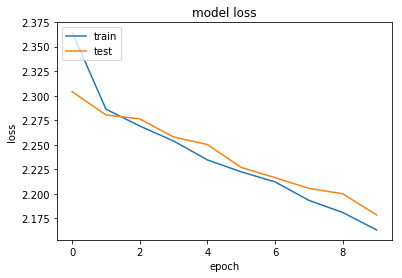

Saved trained model at G:\main_project\project\saved_models\Emotion_Voice_Detection_Model.h5 


In [70]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)




import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [71]:
preds = model.predict(x_testcnn,batch_size=32,verbose=1)

386/386 [==============================] - 1s 3ms/step


In [72]:
preds

array([[0.08236385, 0.101956  , 0.10709053, ..., 0.09458173, 0.10366312,
        0.10367659],
       [0.06936396, 0.10816257, 0.0954012 , ..., 0.09715982, 0.10049938,
        0.10722069],
       [0.07437705, 0.0715185 , 0.07157172, ..., 0.11251193, 0.11999092,
        0.10054161],
       ...,
       [0.07024462, 0.12823537, 0.08563006, ..., 0.08044948, 0.11354875,
        0.10903641],
       [0.0759799 , 0.13638212, 0.06938282, ..., 0.07579024, 0.09477389,
        0.11490251],
       [0.08547281, 0.05570796, 0.12496153, ..., 0.14413023, 0.10126711,
        0.09174751]], dtype=float32)

In [73]:
preds1=preds.argmax(axis=1) 
prd = preds1.astype(int).flatten()
predictions=lb.inverse_transform((prd))
preddf = pd.DataFrame({'predicted_values':predictions})

In [74]:
preds1

array([4, 4, 6, 6, 4, 3, 1, 6, 4, 4, 4, 1, 6, 6, 9, 6, 1, 1, 1, 8, 4, 2,
       1, 4, 1, 4, 8, 5, 1, 4, 2, 4, 5, 4, 9, 4, 4, 1, 4, 6, 4, 0, 6, 4,
       6, 6, 1, 4, 4, 1, 7, 7, 4, 1, 1, 1, 2, 5, 6, 1, 6, 4, 6, 1, 6, 6,
       9, 3, 5, 4, 8, 1, 4, 1, 2, 1, 5, 6, 4, 1, 2, 6, 5, 1, 1, 4, 4, 1,
       4, 4, 9, 4, 4, 7, 6, 4, 1, 0, 4, 7, 5, 7, 1, 7, 4, 1, 4, 5, 4, 3,
       4, 4, 4, 4, 3, 1, 7, 1, 6, 1, 4, 1, 3, 2, 1, 4, 3, 1, 2, 3, 3, 7,
       4, 4, 4, 5, 4, 1, 1, 1, 5, 5, 4, 4, 4, 2, 1, 4, 1, 4, 5, 6, 4, 5,
       1, 6, 1, 1, 1, 4, 1, 4, 5, 6, 5, 6, 8, 5, 1, 4, 4, 2, 4, 5, 1, 4,
       4, 1, 5, 7, 1, 2, 2, 4, 4, 4, 1, 4, 6, 6, 4, 0, 2, 4, 4, 7, 4, 1,
       2, 1, 4, 4, 5, 4, 5, 4, 4, 4, 6, 7, 8, 7, 3, 1, 1, 4, 1, 4, 5, 1,
       1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 1, 5, 4, 5, 5, 6, 5, 6, 6, 3, 4, 6,
       4, 3, 5, 1, 8, 4, 1, 4, 4, 4, 6, 0, 4, 1, 7, 1, 4, 5, 4, 4, 4, 2,
       4, 4, 7, 1, 4, 6, 8, 4, 4, 2, 6, 4, 3, 7, 5, 6, 4, 4, 3, 4, 1, 4,
       2, 9, 6, 1, 6, 1, 1, 7, 4, 6, 1, 6, 3, 1, 4,

In [75]:
prd

array([4, 4, 6, 6, 4, 3, 1, 6, 4, 4, 4, 1, 6, 6, 9, 6, 1, 1, 1, 8, 4, 2,
       1, 4, 1, 4, 8, 5, 1, 4, 2, 4, 5, 4, 9, 4, 4, 1, 4, 6, 4, 0, 6, 4,
       6, 6, 1, 4, 4, 1, 7, 7, 4, 1, 1, 1, 2, 5, 6, 1, 6, 4, 6, 1, 6, 6,
       9, 3, 5, 4, 8, 1, 4, 1, 2, 1, 5, 6, 4, 1, 2, 6, 5, 1, 1, 4, 4, 1,
       4, 4, 9, 4, 4, 7, 6, 4, 1, 0, 4, 7, 5, 7, 1, 7, 4, 1, 4, 5, 4, 3,
       4, 4, 4, 4, 3, 1, 7, 1, 6, 1, 4, 1, 3, 2, 1, 4, 3, 1, 2, 3, 3, 7,
       4, 4, 4, 5, 4, 1, 1, 1, 5, 5, 4, 4, 4, 2, 1, 4, 1, 4, 5, 6, 4, 5,
       1, 6, 1, 1, 1, 4, 1, 4, 5, 6, 5, 6, 8, 5, 1, 4, 4, 2, 4, 5, 1, 4,
       4, 1, 5, 7, 1, 2, 2, 4, 4, 4, 1, 4, 6, 6, 4, 0, 2, 4, 4, 7, 4, 1,
       2, 1, 4, 4, 5, 4, 5, 4, 4, 4, 6, 7, 8, 7, 3, 1, 1, 4, 1, 4, 5, 1,
       1, 4, 4, 4, 1, 1, 1, 4, 1, 4, 1, 5, 4, 5, 5, 6, 5, 6, 6, 3, 4, 6,
       4, 3, 5, 1, 8, 4, 1, 4, 4, 4, 6, 0, 4, 1, 7, 1, 4, 5, 4, 4, 4, 2,
       4, 4, 7, 1, 4, 6, 8, 4, 4, 2, 6, 4, 3, 7, 5, 6, 4, 4, 3, 4, 1, 4,
       2, 9, 6, 1, 6, 1, 1, 7, 4, 6, 1, 6, 3, 1, 4,

In [76]:
predictions

array(['female_sad', 'female_sad', 'male_calm', 'male_calm', 'female_sad',
       'female_happy', 'female_calm', 'male_calm', 'female_sad',
       'female_sad', 'female_sad', 'female_calm', 'male_calm',
       'male_calm', 'male_sad', 'male_calm', 'female_calm', 'female_calm',
       'female_calm', 'male_happy', 'female_sad', 'female_fearful',
       'female_calm', 'female_sad', 'female_calm', 'female_sad',
       'male_happy', 'male_angry', 'female_calm', 'female_sad',
       'female_fearful', 'female_sad', 'male_angry', 'female_sad',
       'male_sad', 'female_sad', 'female_sad', 'female_calm',
       'female_sad', 'male_calm', 'female_sad', 'female_angry',
       'male_calm', 'female_sad', 'male_calm', 'male_calm', 'female_calm',
       'female_sad', 'female_sad', 'female_calm', 'male_fearful',
       'male_fearful', 'female_sad', 'female_calm', 'female_calm',
       'female_calm', 'female_fearful', 'male_angry', 'male_calm',
       'female_calm', 'male_calm', 'female_sad', 'male_ca

In [77]:
preddf

,predicted_values
0,female_sad
1,female_sad
2,male_calm
3,male_calm
4,female_sad
5,female_happy
6,female_calm
7,male_calm
8,female_sad
9,female_sad


In [78]:
preddf.shape

(386, 1)

In [79]:
actual=y_test.argmax(axis=1) 
actualva=actual.astype(int).flatten()
actualvalue = (lb.inverse_transform((actualva)))
actualdf = pd.DataFrame({'actual_values':actualvalue})

In [80]:
actualdf

,actual_values
0,female_sad
1,female_calm
2,male_fearful
3,male_fearful
4,female_sad
5,female_happy
6,female_sad
7,male_sad
8,male_sad
9,male_fearful


In [81]:
finaldf=actualdf.join(preddf)

In [82]:
finaldf[:10]

,actual_values,predicted_values
0,female_sad,female_sad
1,female_calm,female_sad
2,male_fearful,male_calm
3,male_fearful,male_calm
4,female_sad,female_sad
5,female_happy,female_happy
6,female_sad,female_calm
7,male_sad,male_calm
8,male_sad,female_sad
9,male_fearful,female_sad


In [83]:
print(confusion_matrix(actualdf,preddf))

[[ 2 15  5  4 12 11  0  1  0  0]
 [ 0 23  0  0 13  0  2  0  0  0]
 [ 1 11  6  2 10  4  0  2  1  0]
 [ 1 15  2  5  9  0  0  2  1  0]
 [ 0 16  0  2 11  0  2  1  0  1]
 [ 0  1  0  1  6 14  4  5  1  1]
 [ 0  6  0  0 20  1 10  1  1  2]
 [ 1  1  2  1 18  4 10  4  0  3]
 [ 0  0  3  3 20  2  8  4  2  1]
 [ 0  5  1  2 13  0  7  2  1  1]]


In [84]:
# Model Accuracy: how often is the classifier correct?
print('Accuracy is',metrics.accuracy_score(actualdf,preddf))

NameError: name 'metrics' is not defined

In [85]:
score=model.evaluate(x_testcnn, y_test, verbose=0)

In [86]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 20.21%
